In [32]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

## Veri Seti Hikayesi ve Problem:Şeker Hastalığı Tahmini

In [3]:
df = pd.read_csv("./diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Logistic Regression

### Model & Tahmin

In [5]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
y = df["Outcome"]
X = df.drop([])

In [10]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [11]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
loj_model = LogisticRegression(solver = "liblinear").fit(X,y)

In [14]:
loj_model.intercept_

array([-2.2672095])

In [15]:
loj_model.coef_

array([[ 5.96059738e-02,  1.15967430e-03, -1.67562753e-02,
        -5.93239595e-04,  8.27265206e-04, -1.63776066e-02,
         1.72218968e-02, -1.47952676e-02,  7.65974204e+00]])

In [16]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [17]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [18]:
y_pred = loj_model.predict(X)

In [19]:
confusion_matrix(y,y_pred)

array([[500,   0],
       [  0, 268]], dtype=int64)

In [21]:
accuracy_score(y,y_pred)

1.0

In [24]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



In [25]:
loj_model.predict_proba(X)[0:10]

array([[0.03181972, 0.96818028],
       [0.98402147, 0.01597853],
       [0.01528131, 0.98471869],
       [0.98043441, 0.01956559],
       [0.02094559, 0.97905441],
       [0.98081556, 0.01918444],
       [0.01816913, 0.98183087],
       [0.92707965, 0.07292035],
       [0.0239201 , 0.9760799 ],
       [0.02631911, 0.97368089]])

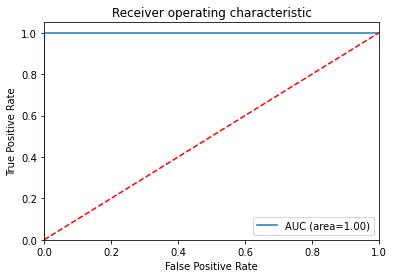

In [27]:
logit_roc_auc = roc_auc_score(y,loj_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area=%0.2f)' % logit_roc_auc)
plt.plot([0, 1],[0, 1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('log_ROC')
plt.show()

## Model tuning (Model Doğrulama)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.30,
                                                   random_state=42)

In [29]:
loj_model = LogisticRegression(solver="liblinear").fit(X_train,y_train)

In [30]:
y_pred = loj_model.predict(X_test)

In [31]:
print(accuracy_score(y_test, y_pred))

1.0


In [34]:
cross_val_score(loj_model, X_test, y_test,cv=10).mean()

array([1., 1., 1., 1., 1.])